In [1]:
import os, fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import psycopg2
import ast
import jieba
import jieba.analyse
import jieba.posseg as pseg
from wordcloud import WordCloud
from pypinyin import pinyin, lazy_pinyin, Style
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def get_ranking_list():
    connect = psycopg2.connect(dbname = 'xyz',
                           user = 'xyz',
                           password = 'xyz',
                           host = 'analytics.ipm.edu.mo',
                           port = '5432'
                          )
    cur = connect.cursor()
    cur.execute('SELECT * FROM xyz.public.ranking')
    temp = pd.DataFrame(cur.fetchall(), columns=[i[0] for i in cur.description])
    connect.close()
    
    return temp

In [3]:
ranking_list = get_ranking_list()

In [5]:
ranking_list.head(10)

,rank_offset,tag,duration,id,rank_score,badgepay,pubdate,author,review,mid,...,play,pic,description,video_review,is_pay,favorites,arcurl,bvid,title,video_zone
senddate,,,,,,,,,,,,,,,,,,,,,
2019-03-02 17:21:05,40.0,"约定的梦幻岛,チカっとチカ千花っ♡,辉夜大小姐想让我告白,雷,诺曼,艾玛,白驹,一人全役,声真似",139.0,44886842.0,472709.0,False,2019-02-28 02:13:17,白驹,2066.0,494225.0,...,472709.0,//i0.hdslb.com/bfs/archive/5eab39c697c5a4578ef...,抱歉又很自不量力地做了很任性的作品——!!!!!!!终于产出了!!!!!!!真的超级超级感谢...,2163.0,0.0,50877.0,http://www.bilibili.com/video/av44886842,BV1yb411t7ya,【是真唱!!!】我们逼雷唱了千花酱的歌!!!（feat.艾玛/诺曼）【超高能】【约定的梦幻岛同人】,31
2019-02-07 07:15:05,41.0,"旋子,生僻字",217.0,42699544.0,471648.0,False,2019-02-05 13:14:05,早木旋子,1351.0,3090403.0,...,471648.0,//i0.hdslb.com/bfs/archive/62d0cc021949485ed0d...,这作点击不过50万，我直播吃jio\n三天三夜的填词加上圈太用肝做的神仙后期，循环吧各位，认...,3353.0,0.0,34044.0,http://www.bilibili.com/video/av42699544,BV1Xb411r7oe,【旋子】哭！都给我哭！！！！惊了，生僻字竟然喊你起床,31
2019-03-04 06:35:04,42.0,"校园vlog,鸽子,学校,学生,搞笑",143.0,45097729.0,458777.0,False,2019-03-02 18:05:08,拉宏桑,1455.0,11870568.0,...,458777.0,//i0.hdslb.com/bfs/archive/e1ce24b16ccf507a0d1...,翻唱：鸽子\n原唱：ilem 洛天依言和av39330059\n歌词：拉宏桑+于呀呀\n感想...,1368.0,0.0,9212.0,http://www.bilibili.com/video/av45097729,BV1Pb411B7ZE,学生版鸽子：上学的痛苦，学生党听了都要流泪（搞笑区up主乱入音乐区）,31
2019-02-10 11:26:22,43.0,"殷志源,水晶男孩,SECHSKIES,平生殷志源",299.0,43142612.0,446648.0,False,2019-02-10 19:26:22,暗里有光光光,691.0,15470404.0,...,446648.0,//i0.hdslb.com/bfs/archive/441babad5dabb28b633...,https://youtu.be/u5q7SyluV_M\n油管上下载下来的饭拍大神a to...,2296.0,0.0,24821.0,http://www.bilibili.com/video/av43142612,BV1nb411S79o,殷志源《可能爱上你了》【a to g1饭拍油管高清】,31
2019-03-06 10:15:17,44.0,"高音,香蜜沉沉烬如霜,古风歌曲,左手指月",154.0,42277231.0,444577.0,False,2019-01-31 23:53:05,西恩Lagseeing,1138.0,171280532.0,...,444577.0,//i0.hdslb.com/bfs/archive/a64e9ff40440907ab5f...,假音一直是我的弱项...\n网易云音乐：西恩,1672.0,0.0,12074.0,http://www.bilibili.com/video/av42277231,BV1sb411k75F,【西恩】翻唱《左手指月》真声（男生原调）原Key 高音 高能预警！！！,31
2019-02-11 03:08:19,45.0,"The Voice Kids,儿童好声音,开口跪,Foo Fighters,Eliza,Be...",172.0,43034799.0,435174.0,False,2019-02-09 15:27:20,呆萌的丸子酱,314.0,135229086.0,...,435174.0,//i0.hdslb.com/bfs/archive/3079d44181f62a5d5af...,地址：https://www.youtube.com/watch?v=cpmoPYpjRk8...,652.0,0.0,13561.0,http://www.bilibili.com/video/av43034799,BV1fb411U751,11岁燃爆全场，震撼好声音现场《Foo Fighters - Best Of You》,31
2019-10-09 07:17:40,46.0,"日文翻唱,Vtuber,湊あくあ,湊-阿库娅,幻夜字幕组,ホロライブ,hololive,虚拟...",197.0,43635970.0,434726.0,False,2019-02-15 15:34:14,湊-阿库娅Official,1701.0,375504219.0,...,434726.0,//i0.hdslb.com/bfs/archive/418b05e539093ffe6a5...,喜欢本视频的话素质三连一波再走吧٩(๑&gt;◡&lt;๑)۶ \n【发布于2019年2月1...,2308.0,0.0,30892.0,http://www.bilibili.com/video/av43635970,BV1ab411273o,【湊あくあ】インドア系ならトラックメイカー【唱了首歌】,31
2019-02-03 13:21:38,47.0,"过年,红包,表情包,春节,新年,开口跪,凯玟桑,斗图表情包,花式拜年大赛",184.0,42556936.0,434043.0,False,2019-02-03 20:50:38,凯玟桑,1281.0,120586.0,...,434043.0,//i0.hdslb.com/bfs/archive/b866e339b5cf2f3fed0...,1. 本家「av18426282」\n2. 这个格式是跟ilem学习的\n3. 因为非常好用...,2440.0,0.0,20777.0,http://www.bilibili.com/video/av42556936,BV1fb41167VN,教你过年如何拿红包，进来的人99%都发财了！！ by 凯玟桑,31
2019-02-02 17:59:27,48.0,"开口跪,藤原书记,书记,藤原千花,「チカっとチカ千花っ♡」,魔性洗脑书记歌,辉夜大小姐想让我告白",97.0,42263753.0,432606.0,False,2019-01-31 20:51:40,多多poi丶,1137.0,11253297.0,...,432606.0,//i0.hdslb.com/bfs/archive/bd7b6b23ffafc5e7680...,感谢@玛丽的对头帮忙赶出来的伴奏！！！一个下午就做完了真的好厉害！！\n恭喜书记成功又血洗了...,1688.0,0.0,11492.0,http://www.bilibili.com/video/av42263753,BV13b411k7cq,【多多翻唱】魔性洗脑书记之歌！「チカっとチカ千花っ♡」,31


In [4]:
ranking_list['senddate']=pd.to_datetime(ranking_list['senddate'], unit = 's')
ranking_list.set_index('senddate', inplace = True)

# Tag Analysis

In [7]:
str(ranking_list['tag'].iloc[0])

'约定的梦幻岛,チカっとチカ千花っ♡,辉夜大小姐想让我告白,雷,诺曼,艾玛,白驹,一人全役,声真似'

In [8]:
row_num = ranking_list['tag'].shape[0]
strlist = []

for i in range(0, row_num):
    tag = ranking_list['tag'].iloc[i]
    strlist.append(str(tag))
input = ','.join(strlist)
    
print('完成')

完成


In [9]:
print(input[:100])

约定的梦幻岛,チカっとチカ千花っ♡,辉夜大小姐想让我告白,雷,诺曼,艾玛,白驹,一人全役,声真似,旋子,生僻字,校园vlog,鸽子,学校,学生,搞笑,殷志源,水晶男孩,SECHSKIES,平生殷志源,


In [10]:
tags=jieba.analyse.extract_tags(input,topK=500, withWeight=True)
keyword_weight = {}
for tag, weight in tags:
    keyword_weight[tag] = weight * 10000 
print(keyword_weight)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.535 seconds.
Prefix dict has been built succesfully.


{'搞笑': 1490.5634063814591, '美食': 853.7088027948796, '打卡': 793.2771331846442, '挑战': 714.7718217502837, '鬼畜': 663.1817485168046, '动画': 575.3843820729428, 'bilibili': 488.6782679358373, '舞蹈': 448.68721362013, '视频': 442.03735000134145, '全能': 412.65125166472933, '剪辑': 390.2731175986949, '教程': 379.62868385827727, '游戏': 378.47283149743333, '自制': 373.79844089390286, '日常': 366.08006625112876, '音乐': 356.185938518756, '原创': 346.7690507693653, 'BILIBILI': 344.3246033714768, '沙雕': 335.53090703329985, '新星': 313.8985821769621, '分享': 274.28449463128493, 'MAD': 264.72452093369265, '科普': 261.8649827605748, '吃货': 261.1842016287123, '生活': 254.09413107686913, '动漫': 248.69810532350874, '混剪': 243.25419740671498, '剧情': 241.03555207848345, '正版': 239.43291263225646, '数码': 238.57530628342096, '时尚': 235.39391909620613, '调教': 227.31411420746926, '人文': 222.86508205329997, '国漫': 217.78673918056595, '纪录片': 216.3935830679539, 'vlog': 215.38845836106313, '计划': 213.28042942474798, 'VOCALOID': 211.16291596479624, '高能': 2

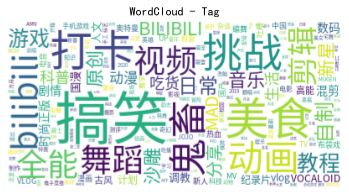

In [15]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight)

plt.imshow(wc)
plt.title("WordCloud - Tag")
plt.axis("off")
plt.show()

In [13]:
tags = jieba.analyse.extract_tags(input,topK=20, withWeight=True)
tag_list = []
weight_list = []

for tag, weight in tags:
    tag_list.append(tag)
    weight_list.append(weight * 10000)

print('完成')

完成


In [18]:
tag_list_num = len(tag_list)
new_tag_list = []
strlist = ' '

for i in range(0, tag_list_num):
    text = strlist.join(lazy_pinyin(tag_list[i]))
    new_tag_list.append(text)

tag_list = new_tag_list
print(tag_list)
print(weight_list)

['gao xiao', 'mei shi', 'da ka', 'tiao zhan', 'gui chu', 'dong hua', 'bilibili', 'wu dao', 'shi pin', 'quan neng', 'jian ji', 'jiao cheng', 'you xi', 'zi zhi', 'ri chang', 'yin yue', 'yuan chuang', 'BILIBILI', 'sha diao', 'xin xing']
[1490.5634063814591, 853.7088027948796, 793.2771331846442, 714.7718217502837, 663.1817485168046, 575.3843820729428, 488.6782679358373, 448.68721362013, 442.03735000134145, 412.65125166472933, 390.2731175986949, 379.62868385827727, 378.47283149743333, 373.79844089390286, 366.08006625112876, 356.185938518756, 346.7690507693653, 344.3246033714768, 335.53090703329985, 313.8985821769621]


[Text(0.5, 0, 'Weights'), Text(0, 0.5, 'Tags'), Text(0.5, 1.0, 'Tag Weight')]

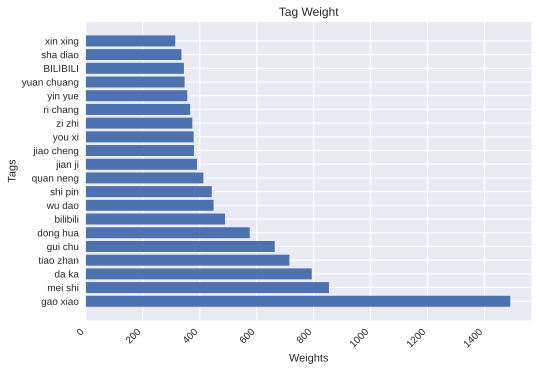

In [19]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list, weight_list)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Tags',
       title='Tag Weight')

# Tag Analysis (Before-After Pandemic)

In [7]:
ranking_list_before['tag'].iloc[0]

'约定的梦幻岛,チカっとチカ千花っ♡,辉夜大小姐想让我告白,雷,诺曼,艾玛,白驹,一人全役,声真似'

In [6]:
ranking_list_before = ranking_list.loc['2019-01':'2019-12']
ranking_list_after = ranking_list.loc['2020-01':'2020-12']

row_num_before = ranking_list_before.shape[0]
row_num_after = ranking_list_after.shape[0]

strlist_before = []
strlist_after = []

for i in range(0, row_num_before):
    tag = ranking_list_before['tag'].iloc[i]
    strlist_before.append(str(tag))
input_before = ','.join(strlist_before)

for i in range(0, row_num_after):
    tag = ranking_list_after['tag'].iloc[i]
    strlist_after.append(str(tag))
input_after = ','.join(strlist_after)
    
print('完成')

<ipython-input-6-e283f9cf2558>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ranking_list_before = ranking_list.loc['2019-01':'2019-12']
<ipython-input-6-e283f9cf2558>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ranking_list_after = ranking_list.loc['2020-01':'2020-12']


完成


In [8]:
tags=jieba.analyse.extract_tags(input_before,topK=500, withWeight=True)
keyword_weight_before = {}
for tag, weight in tags:
    keyword_weight_before[tag] = weight * 10000 
print(keyword_weight_before)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.432 seconds.
Prefix dict has been built succesfully.


{'搞笑': 1400.2560222165982, '动画': 667.5891318899519, '鬼畜': 618.8493318302953, '舞蹈': 552.6089912626345, '挑战': 508.7542536923288, '教程': 502.6017789782031, '音乐': 471.296182491943, '视频': 458.8182430407534, '游戏': 400.0134435929842, '原创': 399.06288435196313, '日常': 397.582723490835, '自制': 364.8040308159798, '打卡': 358.7341885987693, '剪辑': 347.47189004196787, '爆肝': 293.29527949536464, '动漫': 291.3799669858473, '时尚': 286.6565870139604, '古风': 284.9069708862484, 'bilibili': 276.9804978293772, '暑期': 275.9983844070338, 'VOCALOID': 275.1265453673332, '美食': 270.85726515216203, '国漫': 270.67705945842755, '全能': 269.37535493338976, 'MAD': 266.2275735495219, '电音': 259.5533446861634, '数码': 255.77751121854024, '混剪': 255.10385877725773, 'MV': 247.31725843667286, '假面': 245.4249046505569, '编舞': 244.7217249898112, '布袋戏': 239.87521823798045, '国产': 228.49923400906664, '测评': 217.36915328632838, '剧情': 215.41509880360906, '骑士': 213.95122863363792, '杂谈': 210.82309843035173, '调教': 200.3352764593413, 'BILIBILI': 200.22686

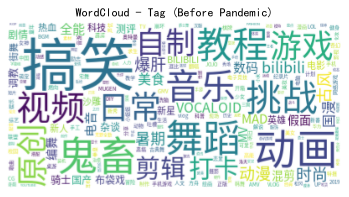

In [9]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_before)

plt.imshow(wc)
plt.title("WordCloud - Tag (Before Pandemic)")
plt.axis("off")
plt.show()

In [10]:
tags=jieba.analyse.extract_tags(input_after,topK=500, withWeight=True)
keyword_weight_after = {}
for tag, weight in tags:
    keyword_weight_after[tag] = weight * 10000 
print(keyword_weight_after)

{'搞笑': 1530.997043078013, '美食': 1113.3031809663212, '打卡': 986.8412860080757, '挑战': 806.593764774155, '鬼畜': 683.0201600931176, 'bilibili': 582.9935247580695, '动画': 534.2893811614931, '全能': 476.4960839283998, '视频': 434.52491785719116, '剪辑': 409.38732845842827, 'BILIBILI': 408.52462451195413, '舞蹈': 402.4955789998196, '沙雕': 400.93184361193397, '自制': 377.8606969714689, '新星': 369.8818126856035, '游戏': 368.8436409649869, '日常': 352.11351365700034, '吃货': 342.1703218639519, '教程': 324.94542318385015, '原创': 323.5441211659749, '分享': 321.928101187979, '科普': 318.4682991444331, '音乐': 304.9076971402964, '生活': 299.1070528590635, '正版': 276.24131305392626, 'MAD': 264.0967269572229, '人文': 255.05158211044696, '剧情': 252.35213905333123, '计划': 252.15429525036163, '调教': 239.35943251564976, 'vlog': 238.34729607889366, '混剪': 238.0171751701971, '纪录片': 237.83633211891032, '数码': 230.95482500977764, '动漫': 229.61200213731308, '高能': 219.49961179011646, '时尚': 212.6106446659429, '奥特曼': 212.46406928896292, '知识': 201.230117

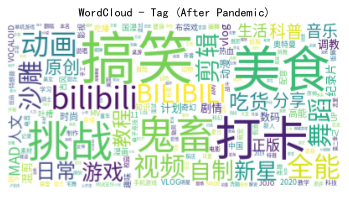

In [11]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_after)

plt.imshow(wc)
plt.title("WordCloud - Tag (After Pandemic)")
plt.axis("off")
plt.show()

In [12]:
tags = jieba.analyse.extract_tags(input_before,topK=20, withWeight=True)
tag_list_before = []
weight_list_before = []

for tag, weight in tags:
    tag_list_before.append(tag)
    weight_list_before.append(weight * 10000)

print('完成')

完成


In [13]:
tag_list_before_num = len(tag_list_before)
new_tag_list_before = []
strlist = ' '

for i in range(0, tag_list_before_num):
    text = strlist.join(lazy_pinyin(tag_list_before[i]))
    new_tag_list_before.append(text)

tag_list_before = new_tag_list_before

In [14]:
tags = jieba.analyse.extract_tags(input_after,topK=20, withWeight=True)
tag_list_after = []
weight_list_after = []

for tag, weight in tags:
    tag_list_after.append(tag)
    weight_list_after.append(weight * 10000)

print('完成')

完成


In [15]:
tag_list_after_num = len(tag_list_after)
new_tag_list_after = []
strlist = ' '

for i in range(0, tag_list_after_num):
    text = strlist.join(lazy_pinyin(tag_list_after[i]))
    new_tag_list_after.append(text)

tag_list_after = new_tag_list_after

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Tags'),
 Text(0.5, 1.0, 'Tag Weight Before Pandemic')]

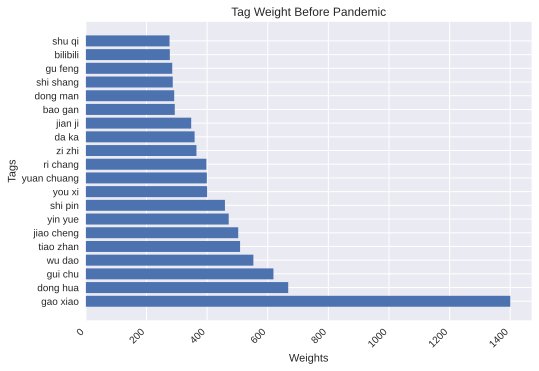

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_before, weight_list_before)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Tags',
       title='Tag Weight Before Pandemic')

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Tags'),
 Text(0.5, 1.0, 'Tag Weight After Pandemic')]

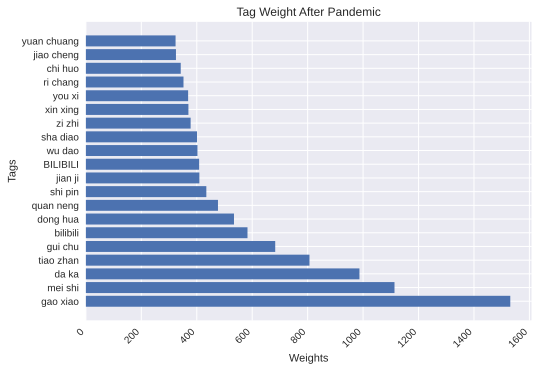

In [17]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_after, weight_list_after)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Tags',
       title='Tag Weight After Pandemic')

# Title & Description

In [19]:
str(ranking_list['description'].iloc[0])

'抱歉又很自不量力地做了很任性的作品——!!!!!!!终于产出了!!!!!!!真的超级超级感谢神宠太太!!!!!!!!!不光改出了超级神仙的歌词!!!!!!而且不厌其烦地陪我确认修改歌词和指导我5555555!!!!!!!!!陆陆续续做了三周多!!!!!!!!!后期银河大大也陪我折腾出了N个版本的后期!!!!!!!!吹爆您!!!!!!!!!!!感谢愿意授权给我视频的守v桜太太!!!!!!!!!您做的视频太可爱了!!!!!!!!!!也非常非常感谢您为我介绍伴奏55555555!!!!!!!!!!!!!!!感谢'

In [20]:
row_num = ranking_list['title'].shape[0]
strlist = []

for i in range(0, row_num):
    temp = [ranking_list['title'].iloc[i], ranking_list['description'].iloc[i]]
    strlist.extend(temp)
    
print('完成')

完成


In [21]:
input = '\n'.join(i for i in strlist if i is not None)

In [22]:
print(input[:1000])

【是真唱!!!】我们逼雷唱了千花酱的歌!!!（feat.艾玛/诺曼）【超高能】【约定的梦幻岛同人】
抱歉又很自不量力地做了很任性的作品——!!!!!!!终于产出了!!!!!!!真的超级超级感谢神宠太太!!!!!!!!!不光改出了超级神仙的歌词!!!!!!而且不厌其烦地陪我确认修改歌词和指导我5555555!!!!!!!!!陆陆续续做了三周多!!!!!!!!!后期银河大大也陪我折腾出了N个版本的后期!!!!!!!!吹爆您!!!!!!!!!!!感谢愿意授权给我视频的守v桜太太!!!!!!!!!您做的视频太可爱了!!!!!!!!!!也非常非常感谢您为我介绍伴奏55555555!!!!!!!!!!!!!!!感谢
【旋子】哭！都给我哭！！！！惊了，生僻字竟然喊你起床
这作点击不过50万，我直播吃jio
三天三夜的填词加上圈太用肝做的神仙后期，循环吧各位，认命了

原唱/曲/词：陈柯宇
策划/填词/唱：早木旋子
混音：圈太
pv：圈太studio-狼宝
学生版鸽子：上学的痛苦，学生党听了都要流泪（搞笑区up主乱入音乐区）
翻唱：鸽子
原唱：ilem 洛天依言和av39330059
歌词：拉宏桑+于呀呀
感想：以后一定要请个人帮我打字幕（太累了）
殷志源《可能爱上你了》【a to g1饭拍油管高清】
https://youtu.be/u5q7SyluV_M
油管上下载下来的饭拍大神a to g1的《可能爱上你了》，最高清版本了，不知道传上来会怎样！表白原唱尹道贤！也期待殷志源今年的solo啦！！！
平生殷志源 ~
【西恩】翻唱《左手指月》真声（男生原调）原Key 高音 高能预警！！！
假音一直是我的弱项...
网易云音乐：西恩
11岁燃爆全场，震撼好声音现场《Foo Fighters - Best Of You》
地址：https://www.youtube.com/watch?v=cpmoPYpjRk8&amp;t=109s
歌手：Eliza(11岁)，Klaas(11岁)，Chiara(13岁)
歌曲：Foo Fighters - Best Of You
节目：The Voice Kids（德国儿童好声音）
非常不错的翻唱现场，每个小歌手的声音辨识度都很高。
【湊あくあ】インドア系ならトラックメイカー【唱了首歌】
喜欢本视频的话素质三连一波再走吧٩(๑&gt;◡&lt;๑)۶

In [23]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input,topK=500, withWeight=True)
keyword_weight = {}
for tag, weight in tags:
    keyword_weight[tag] = weight * 10000 
print(keyword_weight)

{'BGM': 259.7277309652207, '大家': 247.38420422693451, '微博': 215.20664288111158, '喜欢': 211.10686314436975, 'youtube': 206.8241901774753, '关注': 198.54720738051225, 'watch': 156.3156358764831, '动画': 135.58929565123591, '素材': 134.24344491746453, '2019': 130.3129254488766, '感谢': 122.43522931179668, '舞蹈': 120.78260446580337, '点赞': 120.73297950186367, '2020': 115.6008656016782, '制作': 114.76613589327063, '希望': 113.8540013431565, '...': 111.58070971319954, '可以': 108.18993021332881, '编舞': 107.34671574554652, '这个': 106.70255519136013, '一个': 106.41092272443208, '游戏': 104.90406191489126, '真的': 104.11787257605366, '点个': 103.77944794422106, 'PV': 101.4447847603332, '我们': 100.73431896897085, 'http': 100.63220005947049, '自己': 94.1481819798117, '更新': 93.36128970825672, '投币': 91.32277508168292, '中国': 88.99090462076398, '合集': 88.44294172864305, 'bilibili': 87.84468292484165, 'weibo': 86.17674590728137, '音乐': 85.7381406403617, '20': 84.25220319471181, '支持': 84.07575790722098, '一下': 83.11796553743264, '收藏': 

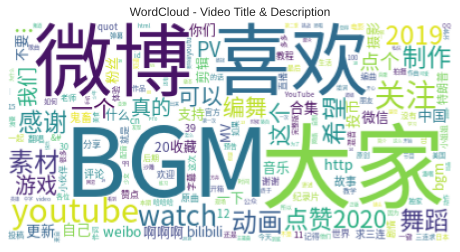

In [24]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight)

plt.imshow(wc)
plt.title("WordCloud - Video Title & Description")
plt.axis("off")
plt.show()

In [25]:
jieba.analyse.set_stop_words('stopwords.txt')
tags = jieba.analyse.extract_tags(input,topK=20, withWeight=True)
tag_list = []
weight_list = []

for tag, weight in tags:
    tag_list.append(tag)
    weight_list.append(weight * 10000)

print('完成')

完成


In [26]:
tag_list_num = len(tag_list)
new_tag_list = []
strlist = ' '

for i in range(0, tag_list_num):
    text = strlist.join(lazy_pinyin(tag_list[i]))
    new_tag_list.append(text)

tag_list = new_tag_list
print(tag_list)
print(weight_list)

['BGM', 'da jia', 'wei bo', 'xi huan', 'youtube', 'guan zhu', 'watch', 'dong hua', 'su cai', '2019', 'gan xie', 'wu dao', 'dian zan', '2020', 'zhi zuo', 'xi wang', '...', 'ke yi', 'bian wu', 'zhe ge']
[259.7277309652207, 247.38420422693451, 215.20664288111158, 211.10686314436975, 206.8241901774753, 198.54720738051225, 156.3156358764831, 135.58929565123591, 134.24344491746453, 130.3129254488766, 122.43522931179668, 120.78260446580337, 120.73297950186367, 115.6008656016782, 114.76613589327063, 113.8540013431565, 111.58070971319954, 108.18993021332881, 107.34671574554652, 106.70255519136013]


[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Title & Description'),
 Text(0.5, 1.0, 'Title & Description Weight')]

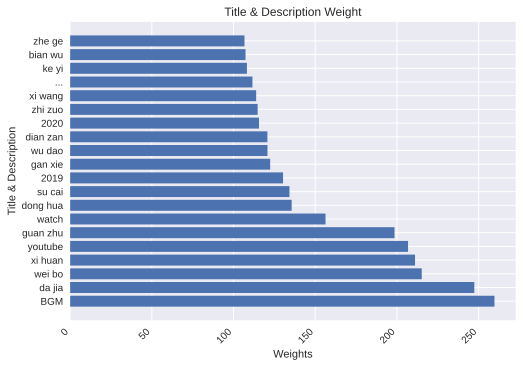

In [27]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list, weight_list)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Title & Description',
       title='Title & Description Weight')

# Title & Description (Before-After Pandemic)

In [28]:
ranking_list_before = ranking_list.loc['2019-01':'2019-12']
ranking_list_after = ranking_list.loc['2020-01':'2020-12']

row_num_before = ranking_list_before['title'].shape[0]
row_num_after = ranking_list_after['title'].shape[0]

strlist_before = []
strlist_after = []

for i in range(0, row_num_before):
    temp = [ranking_list_before['title'].iloc[i], ranking_list_before['description'].iloc[i]]
    strlist_before.extend(temp)

for i in range(0, row_num_after):
    temp = [ranking_list_after['title'].iloc[i], ranking_list_after['description'].iloc[i]]
    strlist_after.extend(temp)

input_before = '\n'.join(i for i in strlist_before if i is not None)
input_after = '\n'.join(i for i in strlist_after if i is not None)
    
print('完成')

<ipython-input-28-92c5c5627012>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ranking_list_before = ranking_list.loc['2019-01':'2019-12']
<ipython-input-28-92c5c5627012>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ranking_list_after = ranking_list.loc['2020-01':'2020-12']


完成


In [29]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_before,topK=500, withWeight=True)
keyword_weight_before = {}
for tag, weight in tags:
    keyword_weight_before[tag] = weight * 10000 
print(keyword_weight_before)

{'微博': 298.1594694272576, 'BGM': 297.8999746757978, '大家': 275.0365800963562, 'youtube': 272.72898378420166, '喜欢': 254.18749290421778, 'watch': 209.6717591794814, '2019': 208.24453804645273, '关注': 200.31299262400444, '动画': 177.52550368500565, '舞蹈': 169.5361428100062, '编舞': 150.89619797384708, '游戏': 132.4048774782528, '感谢': 130.9964077559304, '制作': 127.9433107497916, '素材': 123.21176411037217, '希望': 121.85870295210333, '点个': 118.03428329298839, '这个': 118.00899207007775, '可以': 117.05439987167534, '收藏': 116.84429716805515, '真的': 116.35718725679205, '点赞': 115.34541702386073, 'http': 113.7884485151022, 'PV': 109.8960272432059, '摄影': 107.4926251815982, '一个': 105.19320138885247, '投币': 102.12329704777467, '音乐': 101.38186932312132, '...': 100.42446881492486, '合集': 98.37499432958754, '更新': 98.24092677211338, '我们': 96.50696242460049, 'weibo': 91.60164726529322, '支持': 91.46927577323343, '小姐姐': 91.13588616515409, '微信': 90.30417350799446, 'bilibili': 89.78518400507495, '剪辑': 89.45299930306777, '自己': 8

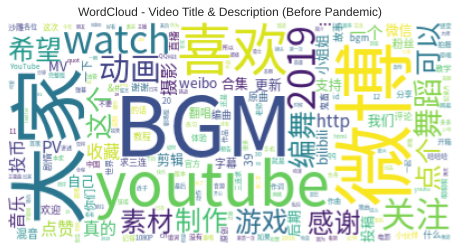

In [30]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_before)

plt.imshow(wc)
plt.title("WordCloud - Video Title & Description (Before Pandemic)")
plt.axis("off")
plt.show()

In [31]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_after,topK=500, withWeight=True)
keyword_weight_after = {}
for tag, weight in tags:
    keyword_weight_after[tag] = weight * 10000 
print(keyword_weight_after)

{'BGM': 241.0039842056194, '大家': 233.77968217478946, '关注': 197.7162228027679, '喜欢': 189.92962874021, '微博': 174.451917611375, 'youtube': 174.3881093020804, '2020': 154.16087525569935, '素材': 139.69399545246185, 'watch': 130.04133434234902, '点赞': 123.40527017571297, '感谢': 118.24800582073568, '...': 117.0882475555498, '动画': 114.99108401251586, '希望': 109.93883012561892, '特朗普': 108.8434224949294, '制作': 108.30737199942568, '一个': 106.96967920027866, '可以': 103.85086749358521, '我们': 102.75986098326075, '这个': 101.16228004392549, '中国': 100.22967285183577, '真的': 98.1183315639201, 'PV': 97.30767167423075, '舞蹈': 96.82891619986891, '点个': 96.78863262992596, '自己': 96.76611724836373, 'http': 94.11725620950187, '2019': 91.7563487656025, '不要': 91.48426703557696, '游戏': 91.39923346333708, '20': 91.24588229124589, '更新': 90.97912921470774, '赞点': 89.65067455888145, 'bilibili': 86.90691725921461, '投币': 86.02840548391018, '编舞': 85.94979261979596, '啊啊啊': 85.8234132547984, '合集': 83.57513306044586, 'weibo': 83.52507

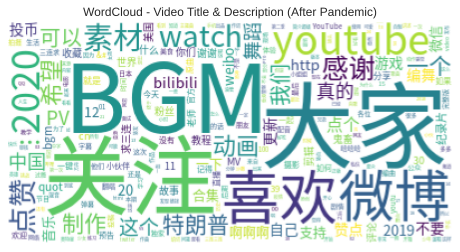

In [32]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_after)

plt.imshow(wc)
plt.title("WordCloud - Video Title & Description (After Pandemic)")
plt.axis("off")
plt.show()

In [33]:
jieba.analyse.set_stop_words('stopwords.txt')
tags = jieba.analyse.extract_tags(input_before,topK=20, withWeight=True)
tag_list_before = []
weight_list_before = []

for tag, weight in tags:
    tag_list_before.append(tag)
    weight_list_before.append(weight * 10000)

print('完成')

完成


In [34]:
tag_list_before_num = len(tag_list_before)
new_tag_list_before = []
strlist = ' '

for i in range(0, tag_list_before_num):
    text = strlist.join(lazy_pinyin(tag_list_before[i]))
    new_tag_list_before.append(text)

tag_list_before = new_tag_list_before

In [35]:
jieba.analyse.set_stop_words('stopwords.txt')
tags = jieba.analyse.extract_tags(input_after,topK=20, withWeight=True)
tag_list_after = []
weight_list_after = []

for tag, weight in tags:
    tag_list_after.append(tag)
    weight_list_after.append(weight * 10000)

print('完成')

完成


In [36]:
tag_list_after_num = len(tag_list_after)
new_tag_list_after = []
strlist = ' '

for i in range(0, tag_list_after_num):
    text = strlist.join(lazy_pinyin(tag_list_after[i]))
    new_tag_list_after.append(text)

tag_list_after = new_tag_list_after

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Title & Description'),
 Text(0.5, 1.0, 'Title & Description Weight Before Pandemic')]

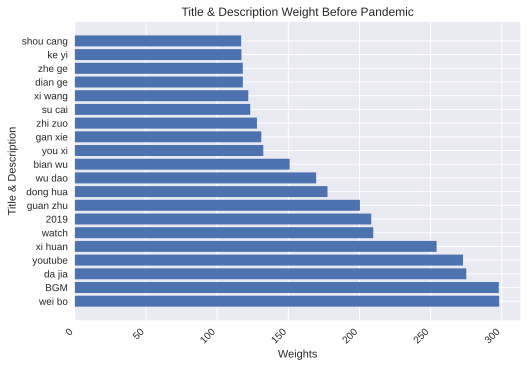

In [37]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_before, weight_list_before)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Title & Description',
       title='Title & Description Weight Before Pandemic')

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Title & Description'),
 Text(0.5, 1.0, 'Title & Description Weight After Pandemic')]

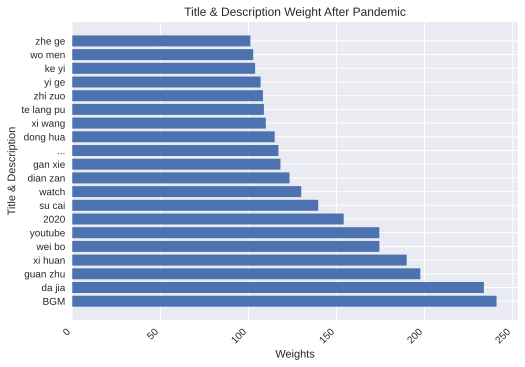

In [38]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_after, weight_list_after)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Title & Description',
       title='Title & Description Weight After Pandemic')

# Comment

In [2]:
def get_comment_list(zone):    
    path = '/mnt/sdb1/Downloads/project/preprocess/comment'
    result = ['{}.csv'.format(zone)]
    return result

In [3]:
# 获取分区列表
zonelist = ['71', '32', '208', '122', '17', '29', '130', '37', '209', '137']
# 获取分区数量
zone_num = len(zonelist)
strlist = []

for z in range(0, zone_num):
    zone_file_list = get_comment_list(zonelist[z])
    
    comment = pd.read_csv('/mnt/sdb1/Downloads/project/preprocess/comment/{}'.format(zone_file_list[0]), engine='python')
    row_num = comment['content'].shape[0]
    
    for i in range(0, row_num):
        content = comment.loc[i, 'content']
        temp = ast.literal_eval(content)
        text = temp['message']
        strlist.append(text)
    del comment
    print(zone_file_list[0], ': 处理完成')
    
input = '\n'.join(strlist)
print('完成')

71.csv : 处理完成
32.csv : 处理完成
208.csv : 处理完成
122.csv : 处理完成
17.csv : 处理完成
29.csv : 处理完成
130.csv : 处理完成
37.csv : 处理完成
209.csv : 处理完成
137.csv : 处理完成
完成


In [6]:
with open('comment.txt', 'w') as comment_file: 
     comment_file.write(input)

In [2]:
with open('comment.txt') as comment_file: 
     input = comment_file.read()

In [3]:
print(input[:1000])

有時我真搞不懂黑子們到底想怎樣
節目到現在第8年了
當年20幾歲的智孝如今都快40了
覺得節目跟以前不一樣?
廢話!!
一集90分鐘的綜藝平均拍攝時間是7小時
沒看到成員跑不動了嗎?

大神受傷那集
大家在碗裡面玩遊戲
看不出來大家都有意讓著鍾國嗎?
鍾國的腰不好
早就沒力氣硬碰**
光洙他們只是故意做出弱小的樣子讓鍾國完成人設
還有王鼻子
都已經54歲了!
最新幾集的偽造級別事件
鏡頭一直沒拍到他
後來跟著嘉賓的鏡頭偶然照到鼻子哥
原來他已經累到走不動
只好坐在樓梯間休息了

這樣的成員、這樣的體力
到底要怎麼跟2013的巔峰時期相比?
想要節目一樣可以啊
把成員換掉、
通通換成年輕的就可以繼續跑了啊!
然後要換人大家又跳出來罵
到底是想怎樣
想要原班人馬繼續出演
就得接受節目一定要轉型的事實!

轉貼
在2018合集里愣了好一会儿才反应过来到2019的了2333
2010合集：av51733654
2011合集：av27998322
2012合集：av28917009
【10-12合集，是全网最高最高画质，不信你可以看一看，值得你回顾和珍藏！】
（1）RM每周日下午韩国时间下午4点放送，在中字没有出来之前，会提前上传韩语字幕版，并在中字出来后，第一时间上传中字，都会放到这个合集中，喜欢的就收藏一下，谢谢！
【多版本中字合集更新顺序：韩语字幕版（生肉）&gt;幻想中字&gt;TSKS中字&gt;繁体中字】
【希望大家多点赞收藏投币、刷弹幕，感谢大家的支持！！！】
（2）不管你是RM老粉还是RM新粉，请尊重成员们和制作组，和谐发弹幕及评论。节目马上9年啦，这么久，每周都要放送，创意是会有枯竭的，不可能保证每期质量都是很高的，再有成员年龄摆在那里，请大家且看且珍惜。如果RM，像无挑一样停播啦，以后大家每周都不用等着看啦。所以，请大家和谐正能量发送弹幕及评论，如发现引站战、讽刺成员、嘉宾等，立刻关进小黑屋。
（3）Running Man陪我们长大，我们陪他一起变老，fighting！！！
过去的一年，我最大的变化就是对算命有了新的认知。

2018年第一集rm:这个神棍都在说些什么啊！
2019年第一集:大师求你帮我算算19年的运气吧……
按照时间推断，光洙恋爱的时间应该是去年的8月份，但是光洙依然表现得很好，跟女嘉宾的互动还是和以前一样，也许光洙和李先彬谈得很好，李先

In [8]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input,topK=500, withWeight=True)
keyword_weight = {}
for tag, weight in tags:
    keyword_weight[tag] = weight * 10000 
print(keyword_weight)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.526 seconds.
Prefix dict has been built succesfully.


{'doge': 824.4723091851046, '真的': 404.1289991660798, '哈哈哈': 320.0482782420102, '弹幕': 298.76070873262205, '喜欢': 284.719681786359, '这个': 254.60417778627678, '就是': 223.52138189834866, '啊啊啊': 220.49091738978896, '自己': 208.35154484261415, '什么': 201.96656932593922, '一个': 199.64243063176534, '觉得': 190.81276014406473, '不是': 182.574769649138, '感觉': 174.576879521618, '老师': 170.84492455656726, '可以': 170.56347766913677, '游戏': 168.81761508109398, '大哭': 168.54575194942205, '粉丝': 164.0096650263367, '没有': 163.1324020637298, '知道': 154.66004564921033, 'tv': 149.72597917813926, '&#': 148.76297039523644, 'call': 148.3088242078448, '现在': 145.96327476105492, '还是': 143.8021897911599, '时候': 142.65855538874436, '滑稽': 141.63609975000293, '你们': 140.11351259374143, '但是': 136.45300255832927, '我们': 135.1755940169788, '怎么': 128.9823982906546, '这么': 128.75698284082682, '看到': 121.87520550412533, '评论': 121.68063876985799, '为什么': 114.26825378652326, 'OK': 113.66786622740335, '那个': 110.39997336574896, '吃瓜': 109.843189299

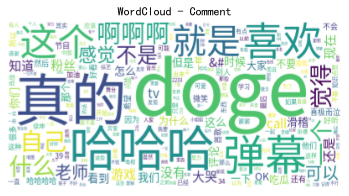

In [9]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight)

plt.imshow(wc)
plt.title("WordCloud - Comment")
plt.axis("off")
plt.show()

In [4]:
tags = jieba.analyse.extract_tags(input,topK=20, withWeight=True)
tag_list = []
weight_list = []

for tag, weight in tags:
    tag_list.append(tag)
    weight_list.append(weight * 10000)

print('完成')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.495 seconds.
Prefix dict has been built succesfully.


完成


In [5]:
tag_list_num = len(tag_list)
new_tag_list = []
strlist = ' '

for i in range(0, tag_list_num):
    text = strlist.join(lazy_pinyin(tag_list[i]))
    new_tag_list.append(text)

tag_list = new_tag_list
print(tag_list)
print(weight_list)

['doge', 'shi pin', 'zhen de', 'up', 'ha ha ha', 'dan mu', 're ci', 'xi huan', 'zhe ge', 'jiu shi', 'a a a', 'zi ji', 'shen me', 'yi ge', 'jue de', 'xi lie', 'bu shi', 'gan jue', 'lao shi', 'ke yi']
[810.4355907205866, 414.1335599819909, 397.24866501604816, 337.63981287007346, 314.5994262591255, 293.67427961909056, 290.6049561804342, 279.87230247474525, 250.26951775747804, 219.71590938756395, 216.73703882175943, 204.80434023183253, 198.52806952274418, 196.24349950802636, 187.56415498929962, 181.89529086226474, 179.46641705592342, 171.60469175865836, 167.93627367723985, 167.65961844948984]


[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Comment'),
 Text(0.5, 1.0, 'Comment Weight')]

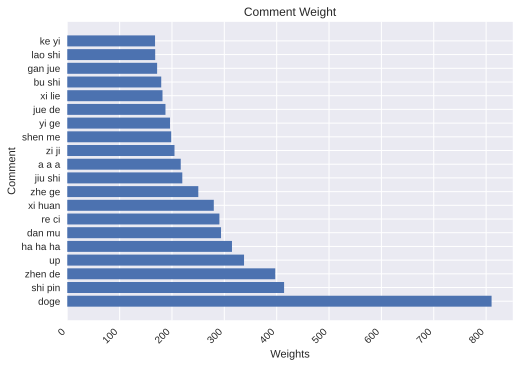

In [6]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list, weight_list)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Comment',
       title='Comment Weight')

# Comment (Before-After Pandemic)

In [2]:
def get_comment_list(zone):    
    path = '/mnt/sdb1/Downloads/project/preprocess/comment'
    result = ['{}.csv'.format(zone)]
    return result

In [ ]:
# 获取分区列表
zonelist = ['71', '32', '208', '122', '17', '29', '130', '37', '209', '137']
# 获取分区数量
zone_num = len(zonelist)
strlist_before = []
strlist_after = []

for z in range(0, zone_num):
    zone_file_list = get_comment_list(zonelist[z])
    
    comment = pd.read_csv('/mnt/sdb1/Downloads/project/preprocess/comment/{}'.format(zone_file_list[0]), engine='python')
    comment['ctime'] = pd.to_datetime(comment['ctime'], unit = 's')
    comment.set_index('ctime', inplace = True)
    
    comment_before = comment.loc['2019-01':'2019-12']
    comment_after = comment.loc['2020-01':'2020-12']
    
    row_num_before = comment_before.shape[0]
    row_num_after = comment_after.shape[0]
        
    for b in range(0, row_num_before):
        # Before
        content = comment_before['content'].iloc[b]
        temp = ast.literal_eval(content)
        text = temp['message']
        strlist_before.append(text)
    for a in range(0, row_num_after):
        # After
        content = comment_after['content'].iloc[a]
        temp = ast.literal_eval(content)
        text = temp['message']
        strlist_after.append(text)
        
    del comment, comment_before, comment_after
    print(zone_file_list[0], ': 处理完成')
    
input_before = '\n'.join(strlist_before)
input_after = '\n'.join(strlist_after)

print('完成')

In [79]:
with open('comment_before.txt', 'w') as comment_before_file: 
     comment_before_file.write(input_before)
with open('comment_after.txt', 'w') as comment_after_file: 
     comment_after_file.write(input_after)

In [7]:
with open('comment_before.txt') as comment_before_file: 
     input_before = comment_before_file.read()
with open('comment_after.txt') as comment_after_file: 
     input_after = comment_after_file.read()

In [8]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_before,topK=500, withWeight=True)
keyword_weight_before = {}
for tag, weight in tags:
    keyword_weight_before[tag] = weight * 10000 
print(keyword_weight_before)

{'真的': 403.0835229146384, '哈哈哈': 287.4352343317593, '喜欢': 287.0438374400194, '弹幕': 280.212058160144, 'doge': 270.2918656459227, '这个': 246.5997500746759, '就是': 220.96697881147696, '什么': 214.51288869845172, '游戏': 208.34048821852204, '一个': 207.52904846113307, '自己': 206.13453662304815, '觉得': 200.178597802065, '滑稽': 199.60149496002913, '不是': 187.74459862902438, '啊啊啊': 184.77936002981977, '粉丝': 180.77166771040453, '你们': 172.98229089575545, '感觉': 170.3223042383427, '没有': 162.68144897193227, '知道': 158.2480472377203, '可以': 157.98956514347367, '徐坤': 154.41369616056562, '时候': 146.05615547251165, '现在': 146.0099755972598, '我们': 143.54201665056203, '还是': 140.48966099941657, '但是': 135.3036743430912, '老师': 132.75813525242748, '这么': 131.13276050467715, '怎么': 123.33129004699842, '看到': 121.35619431684974, '...': 120.22360084105794, '&#': 119.8765698647346, '那个': 119.6551736763871, '为什么': 111.60348047312989, '电视': 109.59684481282812, '评论': 108.29417023341696, '一下': 107.43421364621803, '大家': 107.0681934537

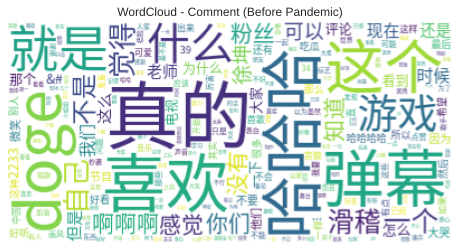

In [9]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_before)

plt.imshow(wc)
plt.title("WordCloud - Comment (Before Pandemic)")
plt.axis("off")
plt.show()

In [10]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_after,topK=500, withWeight=True)
keyword_weight_after = {}
for tag, weight in tags:
    keyword_weight_after[tag] = weight * 10000 
print(keyword_weight_after)

{'doge': 1140.2692394413218, '真的': 404.6548827379816, '哈哈哈': 338.20520271655386, '弹幕': 309.4182686609739, '喜欢': 283.4071079128157, '这个': 259.1479879743942, '啊啊啊': 240.87176841387398, 'tv': 228.358004459785, '就是': 224.99600404504332, '自己': 209.57932644283926, '大哭': 206.86281026958744, 'call': 203.12331941582426, '一个': 195.18145306461074, '什么': 194.85899957047457, '老师': 192.58353865904638, '觉得': 185.50243818353098, '不是': 179.60804701974226, '可以': 177.7695040373271, '感觉': 177.00668542552316, 'OK': 173.53249364415223, '&#': 165.29277183374762, '没有': 163.39931800873785, '粉丝': 154.50029270073966, '知道': 152.64527342276176, '游戏': 146.44121307141359, '现在': 145.94417225587804, '还是': 145.6704067957767, '喜极而泣': 141.43721545387163, '时候': 140.68809507967956, '但是': 137.14275518330274, '怎么': 132.20264480975538, '我们': 130.42850053793097, '评论': 129.3022419524718, '这么': 127.42631601802326, '吃瓜': 122.50464397575495, '看到': 122.1250679175971, '你们': 121.44817305213918, '为什么': 115.80075672948084, '一下': 110.75

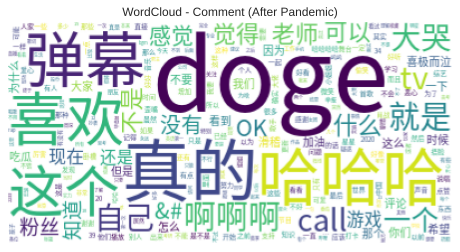

In [11]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_after)

plt.imshow(wc)
plt.title("WordCloud - Comment (After Pandemic)")
plt.axis("off")
plt.show()

In [12]:
tags = jieba.analyse.extract_tags(input_before,topK=20, withWeight=True)
tag_list_before = []
weight_list_before = []

for tag, weight in tags:
    tag_list_before.append(tag)
    weight_list_before.append(weight * 10000)

print('完成')

完成


In [14]:
tag_list_before_num = len(tag_list_before)
new_tag_list_before = []
strlist = ' '

for i in range(0, tag_list_before_num):
    text = strlist.join(lazy_pinyin(tag_list_before[i]))
    new_tag_list_before.append(text)

tag_list_before = new_tag_list_before

In [13]:
tags = jieba.analyse.extract_tags(input_after,topK=20, withWeight=True)
tag_list_after = []
weight_list_after = []

for tag, weight in tags:
    tag_list_after.append(tag)
    weight_list_after.append(weight * 10000)

print('完成')

完成


In [15]:
tag_list_after_num = len(tag_list_after)
new_tag_list_after = []
strlist = ' '

for i in range(0, tag_list_after_num):
    text = strlist.join(lazy_pinyin(tag_list_after[i]))
    new_tag_list_after.append(text)

tag_list_after = new_tag_list_after

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Comment'),
 Text(0.5, 1.0, 'Comment Weight Before Pandemic')]

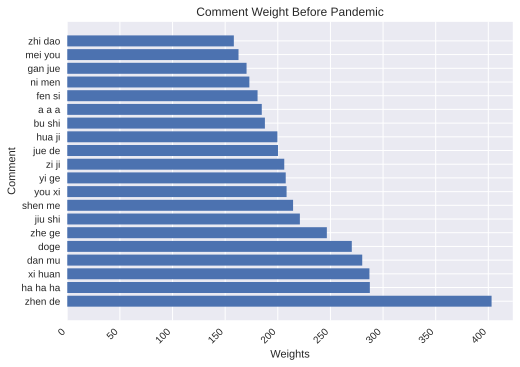

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_before, weight_list_before)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Comment',
       title='Comment Weight Before Pandemic')

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Comment'),
 Text(0.5, 1.0, 'Comment Weight After Pandemic')]

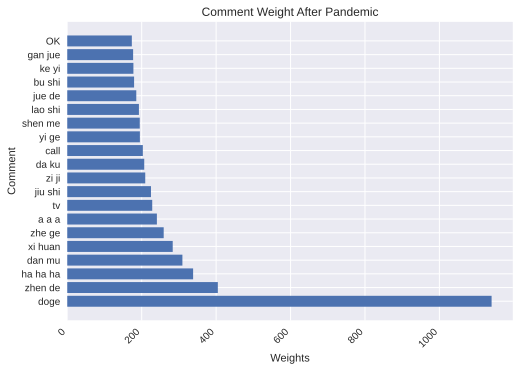

In [17]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_after, weight_list_after)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Comment',
       title='Comment Weight After Pandemic')

# Danmu

In [2]:
def get_file_list(zone):    
    path = '/mnt/sdb1/Downloads/project/preprocess/danmu'
    result = []
    for root, dirs, files in os.walk(path):
        for file in files: 
            if file.startswith('{}-'.format(zone)):
                result.append(os.path.join(file))
                
    result.append('{}.csv'.format(zone))
    return result

In [3]:
# 获取分区列表
zonelist = ['71', '32', '208', '122', '17', '29', '130', '37', '209', '137']
# 获取分区数量
zone_num = len(zonelist)
strlist = []

for i in range(0, zone_num):
    zone_file_list = get_file_list(zonelist[i])
    zone_file_num = len(zone_file_list)
    
    for f in range(0, 1):
        temp = pd.read_csv('/mnt/sdb1/Downloads/project/preprocess/danmu/{}'.format(zone_file_list[f]), \
                           engine='python')
        temp['dm_timestamp'] = pd.to_datetime(temp['dm_timestamp'], unit = 's')
        temp.set_index('dm_timestamp', inplace = True)
        row_num = temp.shape[0]
        
        for b in range(0, row_num):
            content = temp['dm_text'].iloc[b]
            strlist.append(content)
            
        del temp
        print(zone_file_list[f], ': 处理完成')

input = '\n'.join(str(items) for items in strlist)
print('所有分区处理完成')

71-1.csv : 处理完成
32-1.csv : 处理完成
208-1.csv : 处理完成
122-1.csv : 处理完成
17-1.csv : 处理完成
29-1.csv : 处理完成
130-1.csv : 处理完成
37-1.csv : 处理完成
209-1.csv : 处理完成
137-1.csv : 处理完成


TypeError: sequence item 27595: expected str instance, NoneType found

In [16]:
with open('danmu.txt', 'w') as danmu_file: 
     danmu_file.write(input)

In [39]:
with open('danmu.txt') as danmu_file: 
     input = danmu_file.read()

In [15]:
print(input[:1000])

然而还是凉凉
鬼一样
放烟花
。。。啊？？那大户人家还喜欢吃炸鸡呢。。。
不同意
所以要胖一点
真她妈是病态社会
土死我了
无法理解 这种贬低他人价值的价值观
不是的好吗 听起来就很烦因为对方一直在贬低自己的价值。
无语 人家说你没价值 你还要忍着？
对！！！！！！！
快乐是自己给的
畸形审美不可取
？？？？？？？
我开着1.5倍还觉得慢
啊啊啊啊啊啊啊救命
大家冷静思考!!!
救命
各位，冷静思考啊。
有点道理，希望各位认真思考一下。
？？
哈哈哈哈哈哈哈哈哈
为了结婚而结婚……无语
2倍速就刚好哈哈哈哈
支持小贝！！！
萨沙看着太社会了
一日代表的口语水平不错
他们要把我这个密恐吓死
我要做噩梦了
田田更有梗
怎么这样说话
可以这么说，大部分的亲戚都是想看个热闹找个谈资罢了
沟通不了，真的沟通不了，关键是父母还认为她们对
太有同感
萨沙太小了！
厉害超超
我才不
那句话明明很过分
？
但是大姨只是八卦吧？
他在发光！
？
啊这
？
萨沙！
只是因为八卦，说的话都这么难听了
萨沙！
这？有点奇怪
贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝贝
陈超可以演电视剧，快来个导演
?????????????????????
太喜欢天乐了
救命哈哈哈哈哈哈哈哈救命这俩人哈哈哈哈哈哈哈
？？？？拜托公共场合不要这样说好不好真的是
这个大爷过分了啊
天乐哈哈哈哈哈哈加油
哈哈哈哈哈哈哈哈哈哈我们不约
哈哈哈哈哈哈哈哈哈哈哈哈好哈哈哈几年过去了
就很日本了
快把萨沙抱走快快快
绿山墙的安妮
天乐救命哈哈哈哈哈哈哈哈哈哈
太反人类了吧这也
因为太小了
被侮辱还不能反抗 我要这嘴有何用
外星人
？？？？？？？
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈
过分了
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈
哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈
放屁
？？？？？？？？？？？？？？？？？
小贝好棒！！！！
？？？？？？？？？？？？？？
要我的话直接一个巴掌过去
正常！
？？？？？？？？？？？？？？？
你30岁了听到亲戚对你过时的评价然后你不爽摔门走，不就是证明了你其实也就那么点度量
不，应该骂回去
不同意
太帅了没安全感
我妈22结婚，23岁都生下了我
闪电是你吗？
开倍速舒服了
？？？？？？？？？？？？？？
好

In [40]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input,topK=500, withWeight=True)
keyword_weight = {}
for tag, weight in tags:
    keyword_weight[tag] = weight * 10000 
print(keyword_weight)

{'弹幕': 548.793918698423, '真的': 473.15025340179744, '老师': 420.55280150956503, '这个': 376.868405210627, '可爱': 286.7433925965196, '喜欢': 257.88377550936406, '不是': 237.3411423183646, '就是': 228.64093722247497, '2020': 225.23744829676878, '可以': 208.29322465153928, '好看': 181.17550728275887, '感觉': 179.45474092016445, '怎么': 170.09650664532379, '什么': 164.66807817900178, '前面': 164.25168494087717, '为什么': 157.45590515504276, '好听': 154.58669633683334, '卧槽': 145.79376048718262, '那个': 145.08614511265765, '没有': 143.83656846191496, '这么': 143.12177587541723, '一个': 138.39150648358944, '高能': 136.7787798136915, '旗安': 133.476557422293, '成勋': 130.19903643364538, '好帅': 130.1699460106692, '现在': 126.90510557796239, '厉害': 125.55393787296521, '还是': 123.38768988914242, '加油': 121.36120558112799, '跃动': 118.39155555637153, '觉得': 117.48782323411301, '唯私': 116.00291002127798, '自己': 115.43800593021294, '君指': 115.35807231197305, '你们': 115.13455593150648, '好像': 112.52031263795155, '孔子': 111.26615699625647, '这里': 109.53525888

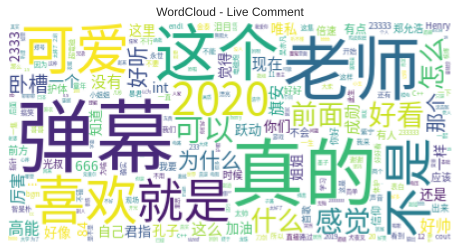

In [41]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight)

plt.imshow(wc)
plt.title("WordCloud - Live Comment")
plt.axis("off")
plt.show()

In [42]:
tags = jieba.analyse.extract_tags(input,topK=20, withWeight=True)
tag_list = []
weight_list = []

for tag, weight in tags:
    tag_list.append(tag)
    weight_list.append(weight * 10000)

print('完成')

完成


In [43]:
tag_list_num = len(tag_list)
new_tag_list = []
strlist = ' '

for i in range(0, tag_list_num):
    text = strlist.join(lazy_pinyin(tag_list[i]))
    new_tag_list.append(text)

tag_list = new_tag_list
print(tag_list)
print(weight_list)

['dan mu', 'zhen de', 'lao shi', 'zhe ge', 'ke ai', 'xi huan', 'bu shi', 'jiu shi', '2020', 'ke yi', 'hao kan', 'gan jue', 'zen me', 'shen me', 'qian mian', 'wei shen me', 'hao ting', 'wo cao', 'na ge', 'mei you']
[548.793918698423, 473.15025340179744, 420.55280150956503, 376.868405210627, 286.7433925965196, 257.88377550936406, 237.3411423183646, 228.64093722247497, 225.23744829676878, 208.29322465153928, 181.17550728275887, 179.45474092016445, 170.09650664532379, 164.66807817900178, 164.25168494087717, 157.45590515504276, 154.58669633683334, 145.79376048718262, 145.08614511265765, 143.83656846191496]


[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Live Comment'),
 Text(0.5, 1.0, 'Live Comment Weight')]

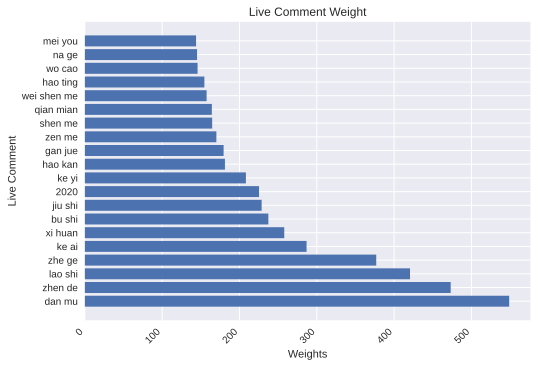

In [44]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list, weight_list)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Live Comment',
       title='Live Comment Weight')

# Live Comment (Before-After Pandemic)

In [22]:
def get_file_list(zone):    
    path = '/mnt/sdb1/Downloads/project/preprocess/danmu'
    result = []
    for root, dirs, files in os.walk(path):
        for file in files: 
            if file.startswith('{}-'.format(zone)):
                result.append(os.path.join(file))
                
    result.append('{}.csv'.format(zone))
    return result

In [23]:
# 获取分区列表
zonelist = ['71', '32', '208', '122', '17', '29', '130', '37', '209', '137']
# 获取分区数量
zone_num = len(zonelist)
strlist_before = []
strlist_after = []

for i in range(0, zone_num):
    zone_file_list = get_file_list(zonelist[i])
    zone_file_num = len(zone_file_list)
    
    for f in range(0, 1):
        temp = pd.read_csv('/mnt/sdb1/Downloads/project/preprocess/danmu/{}'.format(zone_file_list[f]), \
                           engine='python')
        temp['dm_timestamp'] = pd.to_datetime(temp['dm_timestamp'], unit = 's')
        temp.set_index('dm_timestamp', inplace = True)
        
        danmu_before = temp.loc['2019-01':'2019-12']
        row_num_before = danmu_before.shape[0]
        
        danmu_after = temp.loc['2020-01':'2020-12']
        row_num_after = danmu_after.shape[0]

        
        for b in range(0, row_num_before):
            content = danmu_before['dm_text'].iloc[b]
            strlist_before.append(content) 
            
        for a in range(0, row_num_after):
            content = danmu_after['dm_text'].iloc[a]
            strlist_after.append(content)
            
        del temp, danmu_before, danmu_after
        print(zone_file_list[f], ': 处理完成')

input_before = '\n'.join(str(items) for items in strlist_before)
input_after = '\n'.join(str(items) for items in strlist_after)

print('所有分区处理完成')

<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


71-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


32-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


208-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


122-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


17-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


29-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


130-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


37-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


209-1.csv : 处理完成


<ipython-input-23-027f9272db86>:18: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_before = temp.loc['2019-01':'2019-12']
<ipython-input-23-027f9272db86>:21: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  danmu_after = temp.loc['2020-01':'2020-12']


137-1.csv : 处理完成
所有分区处理完成


In [24]:
with open('danmu_before.txt', 'w') as danmu_before_file: 
     danmu_before_file.write(input_before)
with open('danmu_after.txt', 'w') as danmu_after_file: 
     danmu_after_file.write(input_after)

In [29]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_before,topK=500, withWeight=True)
keyword_weight_before = {}
for tag, weight in tags:
    keyword_weight_before[tag] = weight * 10000 
print(keyword_weight_before)

{'真的': 543.19276002239, '弹幕': 522.1548782194743, '这个': 413.86788049475547, '可爱': 361.1094416516733, '喜欢': 343.596489456534, '老师': 262.89254557258863, '旗安': 241.81763755489152, '好看': 240.4638617164112, '不是': 240.39323623242723, '好听': 238.63649702430354, '唯私': 230.8022489267146, '君指': 230.33215737049483, '跃动': 226.63322483194034, '成勋': 226.13944889610224, '感觉': 207.05798033100513, '卧槽': 202.70353793522133, '就是': 193.1790034182975, '好帅': 189.43419197937436, '84': 188.64647099327638, '光叔': 177.50403059314817, '永世': 172.34797389919075, '信仰': 172.3338475303153, '什么': 164.39559887499902, '怎么': 161.79446089540122, '可以': 160.51620536809162, '这么': 155.60387077742672, '超電磁': 152.43671598715852, '姐姐': 151.51543988205918, '没有': 151.17232182897573, '前面': 149.2601127767472, '童年': 148.63043186996651, '首歌': 145.91042671814841, '厉害': 144.63329318049836, 'Henry': 143.6828488997146, '2333': 141.0528772203229, '泪目': 140.1381044622736, '那个': 138.5952645145176, '刀剑': 132.0328228563485, '一生': 131.830226902552

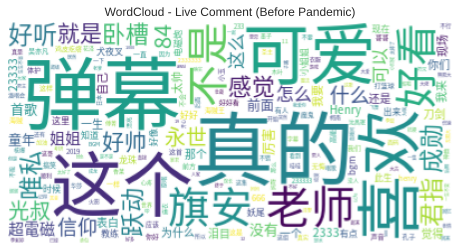

In [30]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_before)

plt.imshow(wc)
plt.title("WordCloud - Live Comment (Before Pandemic)")
plt.axis("off")
plt.show()

In [31]:
jieba.analyse.set_stop_words('stopwords.txt')
tags=jieba.analyse.extract_tags(input_after,topK=500, withWeight=True)
keyword_weight_after = {}
for tag, weight in tags:
    keyword_weight_after[tag] = weight * 10000 
print(keyword_weight_after)

{'弹幕': 565.2374670086338, '老师': 517.8489697086533, '真的': 429.93064530200576, '这个': 354.03898327003765, '2020': 345.03298053974055, '就是': 250.52650065636544, '可爱': 240.85418248620795, '可以': 237.77830556098414, '不是': 235.45962972420293, '喜欢': 204.9922604079331, '怎么': 175.22112388907752, '为什么': 174.06592286177388, '前面': 173.5043854828828, '什么': 164.8375761022879, '感觉': 162.42215210288427, '高能': 162.1215416603516, '加油': 160.80774476398818, 'int': 160.21880512940209, '那个': 149.09288068288654, '一个': 148.6179830957966, '好看': 144.58993221797493, '护体': 140.57857479668115, '没有': 139.31082740362686, '现在': 136.13898071823579, '这么': 135.42020277566348, '郑允浩': 128.84931947622186, '孔子': 125.39982640674161, '智旻朴': 125.14080492637078, '还是': 124.17912869382921, '倍速': 122.099876469215, '这里': 116.54838123219628, '一样': 116.5261231955276, '觉得': 115.81685763515492, 'c++': 114.01526127681747, '厉害': 113.78102722943801, '自己': 113.4363925540722, '好像': 112.57712245657305, '你们': 111.38300994166612, 'C++': 111.2867

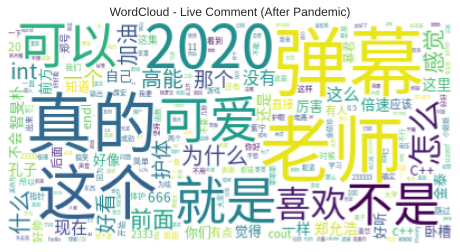

In [32]:
stopwords = []

wc = WordCloud(font_path='NotoSansSC-Regular.otf',
               background_color='white',
               max_words = 2000, 
               stopwords=stopwords)

wc.generate_from_frequencies(keyword_weight_after)

plt.imshow(wc)
plt.title("WordCloud - Live Comment (After Pandemic)")
plt.axis("off")
plt.show()

In [33]:
tags = jieba.analyse.extract_tags(input_before,topK=20, withWeight=True)
tag_list_before = []
weight_list_before = []

for tag, weight in tags:
    tag_list_before.append(tag)
    weight_list_before.append(weight * 10000)

print('完成')

完成


In [34]:
tag_list_before_num = len(tag_list_before)
new_tag_list_before = []
strlist = ' '

for i in range(0, tag_list_before_num):
    text = strlist.join(lazy_pinyin(tag_list_before[i]))
    new_tag_list_before.append(text)

tag_list_before = new_tag_list_before

In [35]:
tags = jieba.analyse.extract_tags(input_after,topK=20, withWeight=True)
tag_list_after = []
weight_list_after = []

for tag, weight in tags:
    tag_list_after.append(tag)
    weight_list_after.append(weight * 10000)

print('完成')

完成


In [36]:
tag_list_after_num = len(tag_list_after)
new_tag_list_after = []
strlist = ' '

for i in range(0, tag_list_after_num):
    text = strlist.join(lazy_pinyin(tag_list_after[i]))
    new_tag_list_after.append(text)

tag_list_after = new_tag_list_after

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Live Comment'),
 Text(0.5, 1.0, 'Live Comment Weight Before Pandemic')]

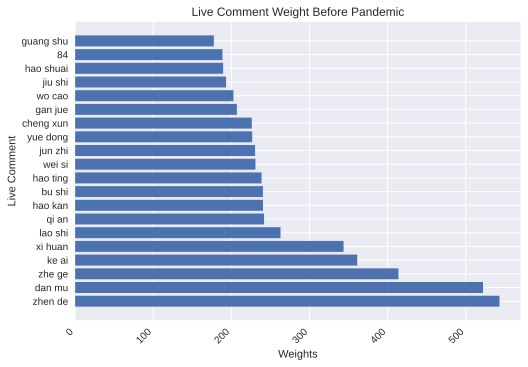

In [37]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_before, weight_list_before)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Live Comment',
       title='Live Comment Weight Before Pandemic')

[Text(0.5, 0, 'Weights'),
 Text(0, 0.5, 'Live Comment'),
 Text(0.5, 1.0, 'Live Comment Weight After Pandemic')]

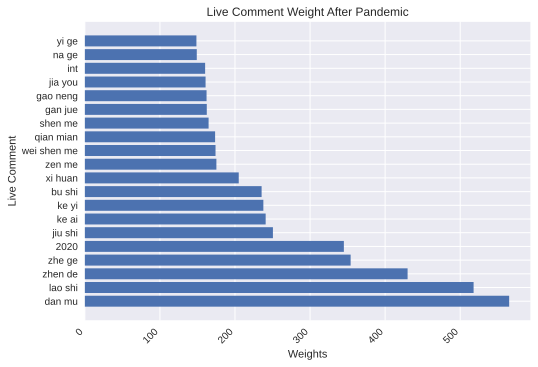

In [38]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.barh(tag_list_after, weight_list_after)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlabel='Weights', ylabel='Live Comment',
       title='Live Comment Weight After Pandemic')